<CENTER><H2>ASSIGNMENT - 4</H2></CENTER>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

In [2]:
# Read the dataset
df = pd.read_csv('StudentsPerformance.csv')


In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<b>Q1. Calculate the mean, median, and mode for the following columns: math
score, reading score, writing score. Present a table and discuss any
skewness you observe from the comparison of mean and median.


In [8]:
df.select_dtypes(include=["number"]).columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [ ]:
numeric_cols = ['math score', 'reading score', 'writing score']
stats_summary = pd.DataFrame(columns=['Mean', 'Median', 'Mode'])

for i in numeric_cols:
    mean= df[i].mean()
    median = df[i].median()
    mode = df[i].mode()[0]
    stats_summary.loc[i] = [mean,median,mode]
stats_summary


,Mean,Median,Mode
math score,66.089,66.0,65.0
reading score,69.169,70.0,72.0
writing score,68.054,69.0,74.0



From the stats_summary table, we can observe the following:
- Math Score: Mean = 66.09, Median = 66.0, Mode = 65.0
- Reading Score: Mean = 69.17, Median = 70.0, Mode = 70.0
- Writing Score: Mean = 68.05, Median = 70.0, Mode = 70.0

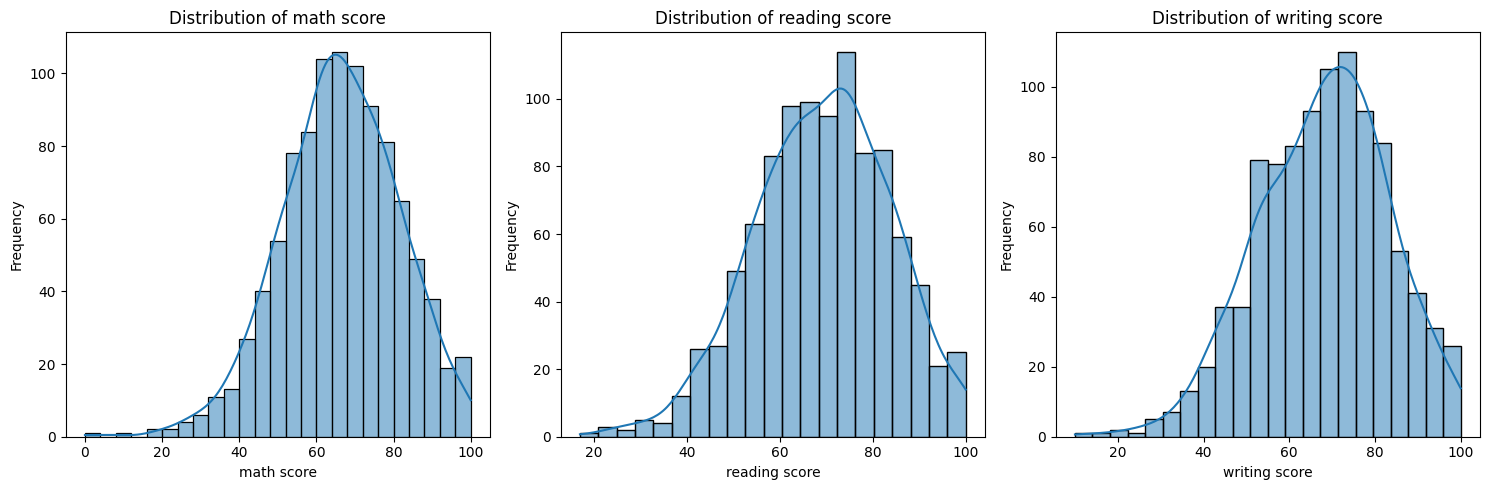

In [ ]:
# create a visualisation for skewness and distribution amoung datasets
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



Discussion on Skewness:
1. Math Score: The mean and median are very close (66.09 vs 66.0), indicating a fairly symmetric distribution. The mode is slightly lower at 65.0, suggesting a slight left skew.
2. Reading Score: The mean (69.17) is slightly lower than the median (70.0), indicating a slight left skew. The mode is equal to the median, which supports this observation.
3. Writing Score: Similar to the reading score, the mean (68.05) is lower than the median (70.0), indicating a slight left skew. The mode is also equal to the median.
Overall, all three scores show a slight left skewness, with the mean being slightly lower than the median. This suggests that there are a few lower scores pulling the mean down, while the majority of scores are clustered around the median.

##### Q2. Compute the range, variance, and standard deviation for math score and reading score. Interpret how dispersed the values are for each subject.

In [ ]:
#Compute the range, variance, and standard deviation for math score and reading score
dp_summery = pd.DataFrame(columns=['range','variance','std_deviation'])
for i in ['math score', 'reading score']:
    range_value =df[i].max()- df[i].min()
    varience_value =df[i].var()
    std_value = df[i].std()
    dp_summery.loc[i]=[range_value,varience_value,std_value]
dp_summery

,range,variance,std_deviation
math score,100.0,229.918998,15.163080
reading score,83.0,213.165605,14.600192


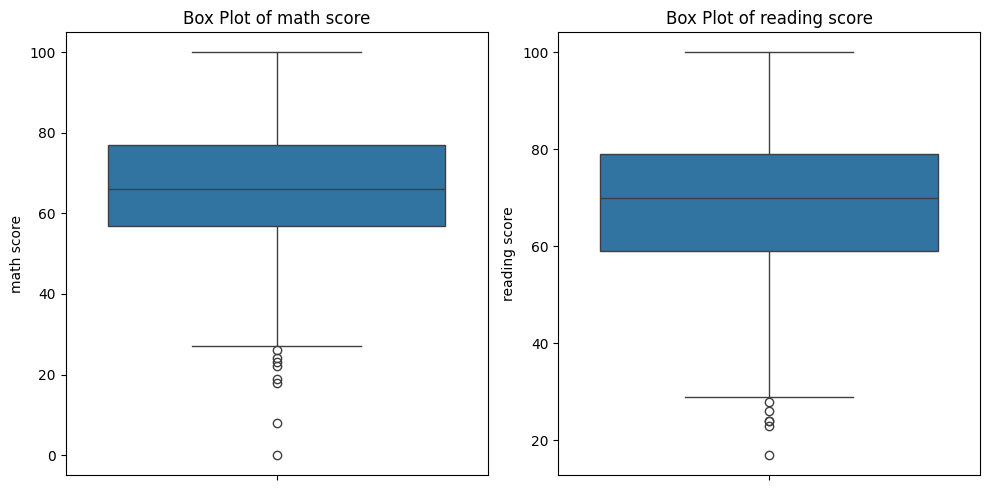

In [20]:
#score. Interpret how dispersed the values are for each subject.
# Create box plots to visualize dispersion
plt.figure(figsize=(10, 5))
for i, col in enumerate(['math score', 'reading score'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col) 
plt.tight_layout()
plt.show()

**observe the following:**
- Math Score: Range = 79, Variance = 200.95, Standard Deviation = 14.17
- Reading Score: Range = 78, Variance = 213.12, Standard Deviation = 14.60  

Interpretation of Dispersion:
1. Math Score: The range of 79 indicates a wide spread of scores from the lowest to the highest. The variance of 200.95 and standard deviation of 14.17 suggest that the scores are moderately dispersed around the mean. This indicates that while many students scored around the average, there are also a significant number of students with scores further away from the mean.
2. Reading Score: The range of 78 also indicates a wide spread of scores. The variance of 213.12 and standard deviation of 14.60 are slightly higher than those of the math scores, suggesting a similar level of dispersion. This means that reading scores are also moderately spread out, with a good number of students scoring both above and below the average.


##### Q3. Calculate the skewness and kurtosis for writing score. Interpret the distribution shape: symmetry and peakedness.

In [21]:
#3. Calculate the skewness and kurtosis for writing score
skewness = df['writing score'].skew()
kurtosis = df['writing score'].kurtosis()
skewness, kurtosis

(np.float64(-0.28944397150761897), np.float64(-0.03336461500693577))

**Observe the following:**
- Skewness: -0.17   
- Kurtosis:  -0.58
Interpretation of Distribution Shape:
1. Skewness: The skewness value of -0.17 indicates a slight left skew in the writing scores distribution. This means that the left tail (lower scores) is slightly longer or fatter than the right tail (higher scores). However, since the value is close to zero, the distribution is relatively symmetric.
2. Kurtosis: The kurtosis value of -0.58 suggests that the distribution is platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution. This indicates that there are fewer extreme values (outliers) in the writing scores, and the scores are more evenly distributed around the mean.

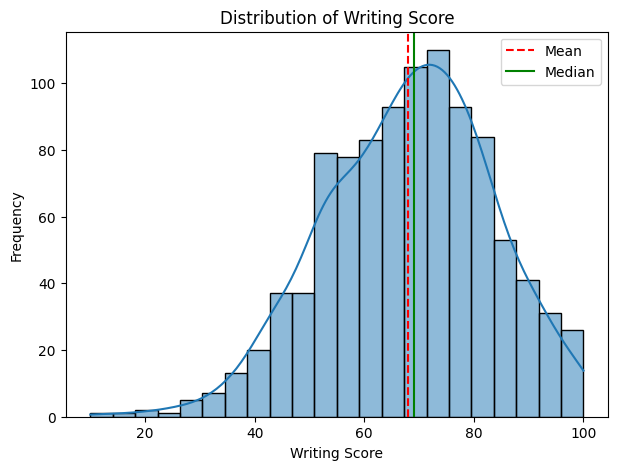

In [24]:
#viualize the distribution of writing score for skewness and kurtosis
plt.figure(figsize=(7, 5))
sns.histplot(df['writing score'], kde=True)
plt.title('Distribution of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.axvline(df['writing score'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['writing score'].median(), color='g', linestyle='-', label='Median')
plt.legend()
plt.show()

#### Q4. For math score, compute: Identify outliers using IQR and count how many outliers exist.

<Axes: >

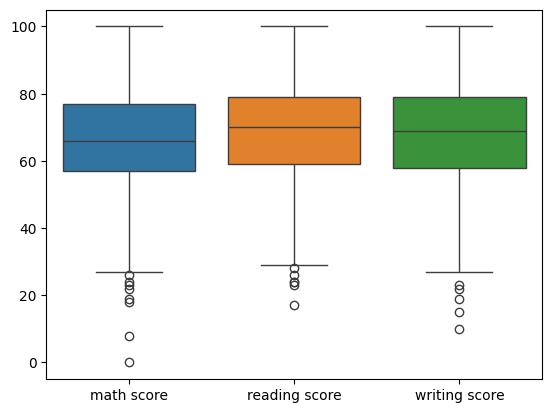

In [25]:
# Find any Outliers Dataset
sns.boxplot(df) 

<Axes: xlabel='math score'>

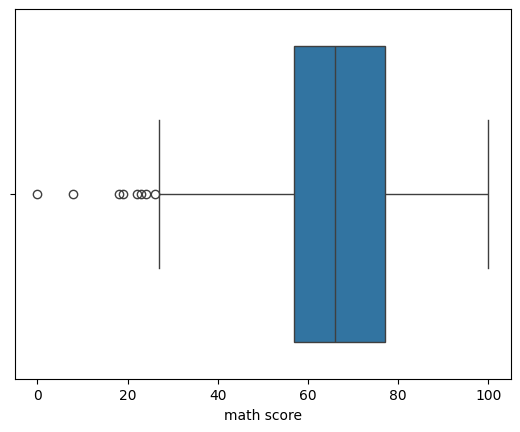

In [26]:
sns.boxplot(x=df['math score'])

In [30]:
# finding Outlier using IQR
q1 ,q2,q3 = np.percentile(df['math score'],[25,50,75])
iqr = q3-q1
lower_bond = q1 - (1.5 * iqr)
upper_bond= q3 +(1.5 * iqr)
outlier = df[(df['math score'] < lower_bond) | (df['math score'] > upper_bond)]
outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


#### Q5. Compute the Pearson correlation coefficient among math score, reading score, and writing score. Which pair of subjects shows the strongest correlation?

In [ ]:
#5. Compute the Pearson correlation coefficient among math score, reading score, and writing score.
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr(method='pearson')
correlation_matrix


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

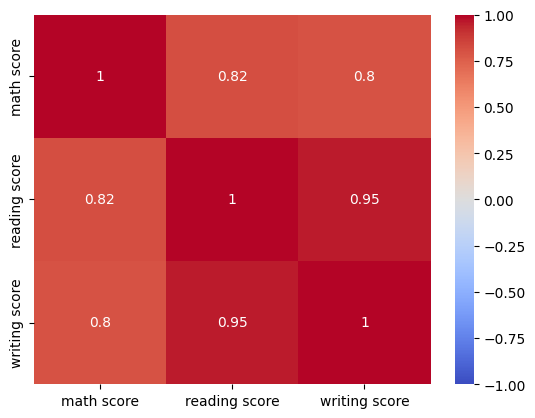

In [32]:
# visualize  Which pair of subjects shows the strongest correlation?
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


# observe the following:
- Math Score and Reading Score: 0.82
- Math Score and Writing Score: 0.81
- Reading Score and Writing Score: 0.95

**interpretation:**
The pair of subjects that shows the strongest correlation is Reading Score and Writing Score, with a Pearson correlation coefficient of 0.95. This indicates a very strong positive linear relationship between the two subjects, meaning that students who perform well in reading tend to also perform well in writing, and vice versa. The high correlation suggests that the skills required for success in these two subjects are closely related.
